In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from IPython.display import display_markdown
from scipy.stats import linregress
import random
import numpy as np

In [44]:
# https://www.kaggle.com/utkarshxy/who-worldhealth-statistics-2020-complete

In [45]:
#Bank Churners
bank_churners = pd.read_csv("BankChurners.csv")
bank_churners

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [46]:
# Drop unneccesary columns
del bank_churners["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"]



In [47]:
del bank_churners["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
bank_churners.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [48]:
# Identify incomplete rows
bank_churners.count()

CLIENTNUM                   10127
Attrition_Flag              10127
Customer_Age                10127
Gender                      10127
Dependent_count             10127
Education_Level             10127
Marital_Status              10127
Income_Category             10127
Card_Category               10127
Months_on_book              10127
Total_Relationship_Count    10127
Months_Inactive_12_mon      10127
Contacts_Count_12_mon       10127
Credit_Limit                10127
Total_Revolving_Bal         10127
Avg_Open_To_Buy             10127
Total_Amt_Chng_Q4_Q1        10127
Total_Trans_Amt             10127
Total_Trans_Ct              10127
Total_Ct_Chng_Q4_Q1         10127
Avg_Utilization_Ratio       10127
dtype: int64

In [49]:
bank_churners.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [50]:
# Summary Statistics for Churners
churners = bank_churners.loc[bank_churners["Attrition_Flag"]=="Attrited Customer"]
churners.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.627000e+03,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
mean,7.352614e+08,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
std,3.557725e+07,7.665652,1.275010,7.796548,1.577782,0.899623,1.090537,9095.334105,921.385582,9109.208129,0.214924,2308.227629,14.568429,0.226854,0.264458
min,7.080833e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.123713e+08,41.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2114.000000,0.000000,1587.000000,0.544500,1903.500000,37.000000,0.400000,0.000000
50%,7.165644e+08,47.000000,2.000000,36.000000,3.000000,3.000000,3.000000,4178.000000,0.000000,3488.000000,0.701000,2329.000000,43.000000,0.531000,0.000000
75%,7.683737e+08,52.000000,3.000000,40.000000,5.000000,3.000000,4.000000,9933.500000,1303.500000,9257.500000,0.856000,2772.000000,51.000000,0.692000,0.231000
max,8.282949e+08,68.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,1.492000,10583.000000,94.000000,2.500000,0.999000


In [51]:
# Summary Statistics for Existing Customers
content = bank_churners.loc[bank_churners["Attrition_Flag"]=="Existing Customer"]
content.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,8.500000e+03,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000
mean,7.399272e+08,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412
std,3.710723e+07,8.081157,1.303229,8.021810,1.528949,1.016741,1.081436,9084.969807,757.745354,9087.671862,0.217783,3512.772635,22.919011,0.228054,0.272568
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,15.000000,0.256000,816.000000,11.000000,0.028000,0.000000
25%,7.132197e+08,41.000000,1.000000,31.000000,3.000000,1.000000,2.000000,2602.000000,800.000000,1184.500000,0.643000,2384.750000,54.000000,0.617000,0.055000
50%,7.181643e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4643.500000,1364.000000,3469.500000,0.743000,4100.000000,71.000000,0.721000,0.211000
75%,7.783415e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11252.750000,1807.000000,9978.250000,0.860000,4781.250000,82.000000,0.833000,0.529250
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,5.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.994000


In [52]:
# Visualization of Average Utilization Ratio
churner_percentage = churners["Avg_Utilization_Ratio"].mean()
churner_percentage

content_percentage = content["Avg_Utilization_Ratio"].mean()
content_percentage

0.2964117647058824

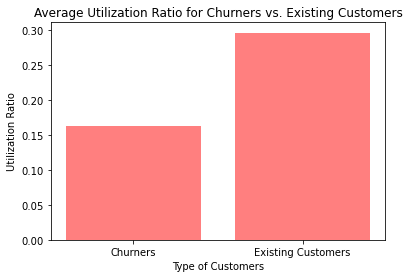

In [53]:
# Bar Graph
customers = [churner_percentage, content_percentage]
x_axis = np.arange(len(customers))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Churners", "Existing Customers"])
plt.bar(x_axis, customers, color='r', alpha=0.5, align="center")
plt.title("Average Utilization Ratio for Churners vs. Existing Customers")
plt.ylabel("Utilization Ratio")
plt.xlabel("Type of Customers")
plt.show()

In [54]:
# Does Age affect churners?
churners["Customer_Age"].value_counts()
#bins for churners
bins = [20, 29, 39, 49, 59, 100]
group_names = ["20's", "30's", "40's", "50s", "60 and over"]
churners["Age Groups"] = pd.cut(churners["Customer_Age"], bins, labels=group_names, include_lowest=False)
churners

churners_by_age = churners.groupby("Age Groups").count()
churners_by_age

<ipython-input-54-1fbbb37b5dba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churners["Age Groups"] = pd.cut(churners["Customer_Age"], bins, labels=group_names, include_lowest=False)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Age Groups,,,,,,,,,,,,,,,,,,,,,
20's,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
30's,261,261,261,261,261,261,261,261,261,261,...,261,261,261,261,261,261,261,261,261,261
40's,772,772,772,772,772,772,772,772,772,772,...,772,772,772,772,772,772,772,772,772,772
50s,506,506,506,506,506,506,506,506,506,506,...,506,506,506,506,506,506,506,506,506,506
60 and over,71,71,71,71,71,71,71,71,71,71,...,71,71,71,71,71,71,71,71,71,71


<function matplotlib.pyplot.show(close=None, block=None)>

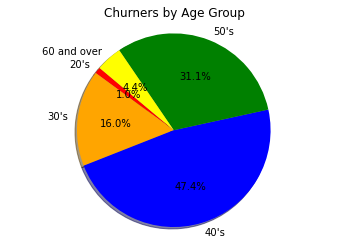

In [55]:
# Pie chart for number of churners by age
labels = ["20's", "30's", "40's", "50's","60 and over"]
sizes = [17, 261, 772, 506, 71]

colors = ["red", "orange", "blue", "green","yellow"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Churners by Age Group")
plt.axis("equal")

plt.show

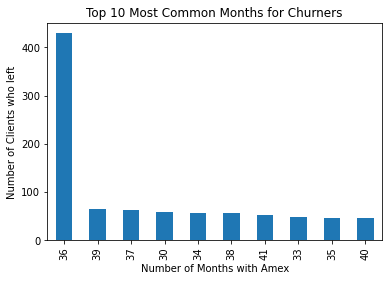

In [56]:
#Looking at Churners by How Long they had their cards churners["Months_on_book"].value_counts()
month_count = churners["Months_on_book"].value_counts().sort_values(ascending=False)
month_count[:10].plot(kind='bar')
plt.title("Top 10 Most Common Months for Churners")
plt.xlabel("Number of Months with Amex")
plt.ylabel("Number of Clients who left")
plt.show()

In [57]:
#Looking at Churners by Education
#First, split the data into groups based on gender
churner_groups = churners.groupby("Education_Level")
churner_groups.head()
#Then, once the groups are made, count how many are in each group
churners_by_ed = churner_groups["CLIENTNUM"].count()
churners_by_ed


Education_Level
College          154
Doctorate         95
Graduate         487
High School      306
Post-Graduate     92
Uneducated       237
Unknown          256
Name: CLIENTNUM, dtype: int64

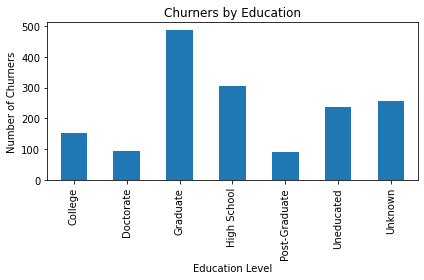

In [58]:
#Make chart based on education level
education_chart = churners_by_ed.plot(kind="bar")
plt.title("Churners by Education")
plt.xlabel("Education Level")
plt.ylabel("Number of Churners")
plt.tight_layout()
plt.show()

In [59]:
# Looking at Churners via Income Level
#First, split the data into groups based on gender
churner_groups_income = churners.groupby("Income_Category")
#Then, once the groups are made, count how many are in each group
churners_by_income = churner_groups_income["CLIENTNUM"].count()
churners_by_income

Income_Category
$120K +           126
$40K - $60K       271
$60K - $80K       189
$80K - $120K      242
Less than $40K    612
Unknown           187
Name: CLIENTNUM, dtype: int64

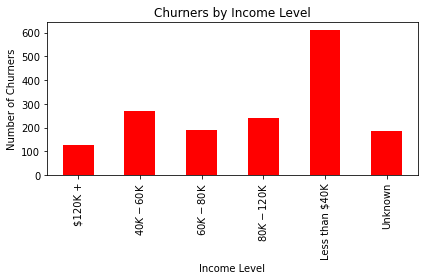

In [60]:
#Make chart based on income
income_chart = churners_by_income.plot(kind="bar", color="red")
plt.title("Churners by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Number of Churners")
plt.tight_layout()
plt.show()

In [61]:
#Churners by Marital Status
#First, split the data into groups based on gender
churner_groups_mar = churners.groupby("Marital_Status")
#Then, once the groups are made, count how many are in each group
churners_by_mar = churner_groups_mar["CLIENTNUM"].count()
churners_by_mar

Marital_Status
Divorced    121
Married     709
Single      668
Unknown     129
Name: CLIENTNUM, dtype: int64

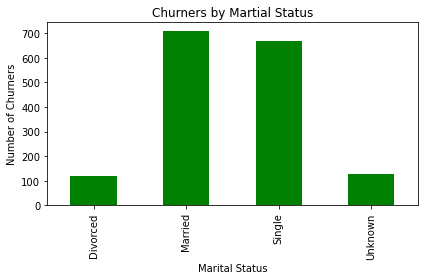

In [62]:
#Make chart based on Marital Status
income_chart = churners_by_mar.plot(kind="bar", color="green")
plt.title("Churners by Martial Status")
plt.xlabel("Marital Status")
plt.ylabel("Number of Churners")
plt.tight_layout()
plt.show()

In [102]:
#Looking at Churner at Credit Limit
churners["Credit_Limit"].min()

1438.3

In [103]:
churners["Credit_Limit"].max()

34516.0

In [104]:
churners["Credit_Limit"].value_counts()

1438.3     124
34516.0     89
9959.0       5
1666.0       3
3261.0       3
          ... 
24542.0      1
13589.0      1
8808.0       1
5026.0       1
3552.0       1
Name: Credit_Limit, Length: 1306, dtype: int64

In [106]:

#bins for churners
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
group_names = ["under 5,000", "5,000 to 10,000", "10,000 to 15,000", "15,000 to 20,000", "20,000 to 25,000", "25,000 to 30,000", "30,000 to 35,000"]
churners["Credit_Limit_Groups"] = pd.cut(churners["Credit_Limit"], bins, labels=group_names, include_lowest=False)
churners

churners_by_credit_limit = churners.groupby("Credit_Limit_Groups").count()
churners_by_credit_limit

<ipython-input-106-9a9a313de5fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churners["Credit_Limit_Groups"] = pd.cut(churners["Credit_Limit"], bins, labels=group_names, include_lowest=False)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age Groups
Credit_Limit_Groups,,,,,,,,,,,,,,,,,,,,,
"under 5,000",926,926,926,926,926,926,926,926,926,926,...,926,926,926,926,926,926,926,926,926,926
"5,000 to 10,000",302,302,302,302,302,302,302,302,302,302,...,302,302,302,302,302,302,302,302,302,302
"10,000 to 15,000",145,145,145,145,145,145,145,145,145,145,...,145,145,145,145,145,145,145,145,145,145
"15,000 to 20,000",70,70,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
"20,000 to 25,000",43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
"25,000 to 30,000",33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
"30,000 to 35,000",108,108,108,108,108,108,108,108,108,108,...,108,108,108,108,108,108,108,108,108,108


<function matplotlib.pyplot.show(close=None, block=None)>

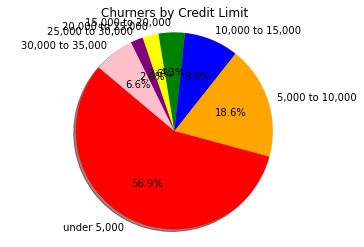

In [107]:
labels = ["under 5,000", "5,000 to 10,000", "10,000 to 15,000", "15,000 to 20,000", "20,000 to 25,000", "25,000 to 30,000", "30,000 to 35,000"]
sizes = [926, 302, 145, 70, 43, 33, 108]

colors = ["red", "orange", "blue", "green","yellow","purple", "pink"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Churners by Credit Limit")
plt.axis("equal")

plt.show

In [110]:

churners["Total_Revolving_Bal"].value_counts()

0       893
2517    158
710       3
1381      3
321       3
       ... 
1799      1
989       1
996       1
1000      1
2024      1
Name: Total_Revolving_Bal, Length: 514, dtype: int64

In [113]:
#Churners by Total Revolving Balance
#bins for churners
bins = [0, 500, 1000, 1500, 2000, 2500, 3000]
group_names = ["under 500", "500 to 1000", "1000 to 1500", "1500 to 2000", "2000 to 2500", "2500 to 3000"]
churners["Balance_Groups"] = pd.cut(churners["Total_Revolving_Bal"], bins, labels=group_names, include_lowest=False)
churners

churners_by_balance = churners.groupby("Balance_Groups").count()
churners_by_balance

<ipython-input-113-9d6880dc8c99>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churners["Balance_Groups"] = pd.cut(churners["Total_Revolving_Bal"], bins, labels=group_names, include_lowest=False)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age Groups,Credit_Limit_Groups
Balance_Groups,,,,,,,,,,,,,,,,,,,,,
under 500,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106
500 to 1000,163,163,163,163,163,163,163,163,163,163,...,163,163,163,163,163,163,163,163,163,163
1000 to 1500,102,102,102,102,102,102,102,102,102,102,...,102,102,102,102,102,102,102,102,102,102
1500 to 2000,109,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109
2000 to 2500,92,92,92,92,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,92
2500 to 3000,162,162,162,162,162,162,162,162,162,162,...,162,162,162,162,162,162,162,162,162,162


<function matplotlib.pyplot.show(close=None, block=None)>

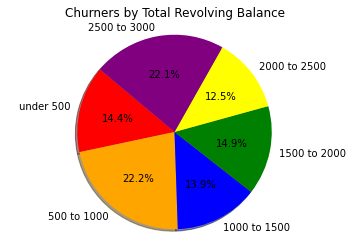

In [114]:
#Pie chart for churners by balance
labels = ["under 500", "500 to 1000", "1000 to 1500", "1500 to 2000", "2000 to 2500", "2500 to 3000"]
sizes = [106, 163, 102, 109, 92, 162]

colors = ["red", "orange", "blue", "green","yellow","purple"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Churners by Total Revolving Balance")
plt.axis("equal")

plt.show



In [117]:
churners["Total_Trans_Amt"].min()

510

In [118]:
churners["Total_Trans_Amt"].max()

10583

In [123]:
# Churners by Transaction Amount
bins = [0, 2000, 4000, 6000, 8000, 10000, 12000]
group_names = ["under 2000", "2000 to 4000", "4000 to 6000", "6000 to 8000", "8000 to 10,000", "10,000 to 12,000"]
churners["Trans_Amt_Groups"] = pd.cut(churners["Total_Trans_Amt"], bins, labels=group_names, include_lowest=False)


churners_by_trans_amt = churners.groupby("Trans_Amt_Groups").count()
churners_by_trans_amt

<ipython-input-123-0ae25c070f19>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churners["Trans_Amt_Groups"] = pd.cut(churners["Total_Trans_Amt"], bins, labels=group_names, include_lowest=False)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age Groups,Credit_Limit_Groups,Balance_Groups
Trans_Amt_Groups,,,,,,,,,,,,,,,,,,,,,
under 2000,472,472,472,472,472,472,472,472,472,472,...,472,472,472,472,472,472,472,472,472,206
2000 to 4000,846,846,846,846,846,846,846,846,846,846,...,846,846,846,846,846,846,846,846,846,383
4000 to 6000,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,39
6000 to 8000,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,32
"8000 to 10,000",143,143,143,143,143,143,143,143,143,143,...,143,143,143,143,143,143,143,143,143,66
"10,000 to 12,000",10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,8


<function matplotlib.pyplot.show(close=None, block=None)>

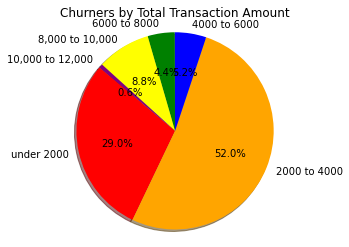

In [124]:
#pie chart
labels = ["under 2000", "2000 to 4000", "4000 to 6000", "6000 to 8000", "8,000 to 10,000", "10,000 to 12,000"]
sizes = [472, 846, 84, 72, 143, 10]

colors = ["red", "orange", "blue", "green","yellow","purple"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Churners by Total Transaction Amount")
plt.axis("equal")

plt.show

In [128]:
bins = [0, 20, 40, 60, 80, 100]
group_names = ["under 20", "20 to 40", "40 to 60", "60 to 80", "80 to 100"]
churners["Trans_Count_Groups"] = pd.cut(churners["Total_Trans_Ct"], bins, labels=group_names, include_lowest=False)


churners_by_trans_amt = churners.groupby("Trans_Count_Groups").count()
churners_by_trans_amt

<ipython-input-128-4b87691767df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churners["Trans_Count_Groups"] = pd.cut(churners["Total_Trans_Ct"], bins, labels=group_names, include_lowest=False)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age Groups,Credit_Limit_Groups,Balance_Groups,Trans_Amt_Groups
Trans_Count_Groups,,,,,,,,,,,,,,,,,,,,,
under 20,81,81,81,81,81,81,81,81,81,81,...,81,81,81,81,81,81,81,81,34,81
20 to 40,530,530,530,530,530,530,530,530,530,530,...,530,530,530,530,530,530,530,530,231,530
40 to 60,780,780,780,780,780,780,780,780,780,780,...,780,780,780,780,780,780,780,780,364,780
60 to 80,205,205,205,205,205,205,205,205,205,205,...,205,205,205,205,205,205,205,205,91,205
80 to 100,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,14,31


<function matplotlib.pyplot.show(close=None, block=None)>

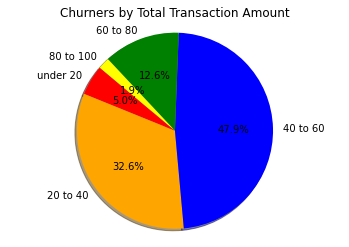

In [129]:
labels = ["under 20", "20 to 40", "40 to 60", "60 to 80", "80 to 100"]
sizes = [81, 530, 780, 205, 31]

colors = ["red", "orange", "blue", "green","yellow"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Churners by Total Transaction Count")
plt.axis("equal")

plt.show